In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Get data

In [2]:
iris = load_iris()

# Split into train and test sets using the same random state
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=12)

## Get prediction

In [5]:
# Serialize the data into json and send the request to the model
payload = {'data': json.dumps(X_test.tolist())}
y_predict = requests.post('http://127.0.0.1:5000/iris', data=payload).json()

# Make array from the list
y_predict = np.array(y_predict)
y_predict

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

## Evaluate performance

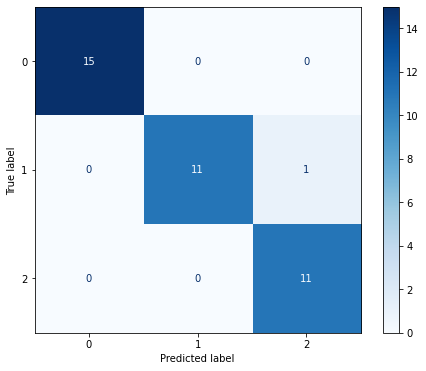

In [4]:
# Plot the confusion matrix and compare with the original one. They are the same
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()